<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1> ML & DL </h1></b></center>

<center><b><h1>Lab - 7</b></center>    
<pre>    

# Do all pre processing on diabetes csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Keep plots inline
%matplotlib inline

# Load the CSV
csv_path = "diabetes.csv"
df = pd.read_csv(csv_path)

# Peek at the top rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


# Import diabetes.csv data ser using sklearn

In [3]:
# Basic information about the dataset
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")
df.info()

Rows: 768, Columns: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [4]:
# Quick statistical summary
summary = df.describe(include="all")
summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Diabetic
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


# Check the distribution of the target

C:\Users\shrey\AppData\Local\Temp\ipykernel_16452\2015849333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Outcome", palette="Set2")


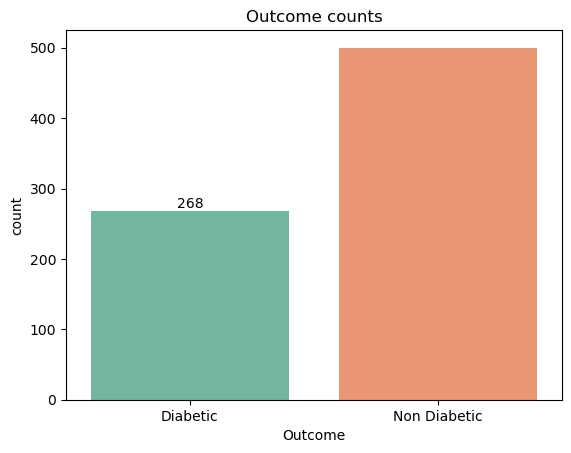

Outcome
Non Diabetic    0.651042
Diabetic        0.348958
Name: proportion, dtype: float64

In [5]:
# Distribution of Outcome labels
ax = sns.countplot(data=df, x="Outcome", palette="Set2")
ax.bar_label(ax.containers[0])
plt.title("Outcome counts")
plt.show()

# Store class proportions for later reference
class_props = df["Outcome"].value_counts(normalize=True)
class_props

# Replace zeros with NaN for specific columns

In [6]:
# Features where a zero is physiologically implausible; replace with NaN before imputation
zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[zero_as_missing] = df[zero_as_missing].replace(0, np.nan)

df[zero_as_missing].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


# Check for missing values

In [7]:
# Count missing values after the replacement
missing_counts = df.isna().sum()
missing_counts[missing_counts > 0]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

# Fill missing values with median

In [8]:
# Impute missing numeric values with the median of each column
median_values = df.median(numeric_only=True)
df_filled = df.copy()
df_filled[median_values.index] = df_filled[median_values.index].fillna(median_values)

df_filled.isna().sum().sum()  # should be 0

0

# Convert Target data into integer code

In [9]:
# Encode Outcome labels to integers: Diabetic -> 1, Non Diabetic -> 0
label_map = {"Non Diabetic": 0, "Diabetic": 1}
df_filled["Outcome"] = df_filled["Outcome"].map(label_map)

df_filled[["Outcome"]].head()

,Outcome
0,1
1,0
2,1
3,0
4,1


# Visualize Distributions

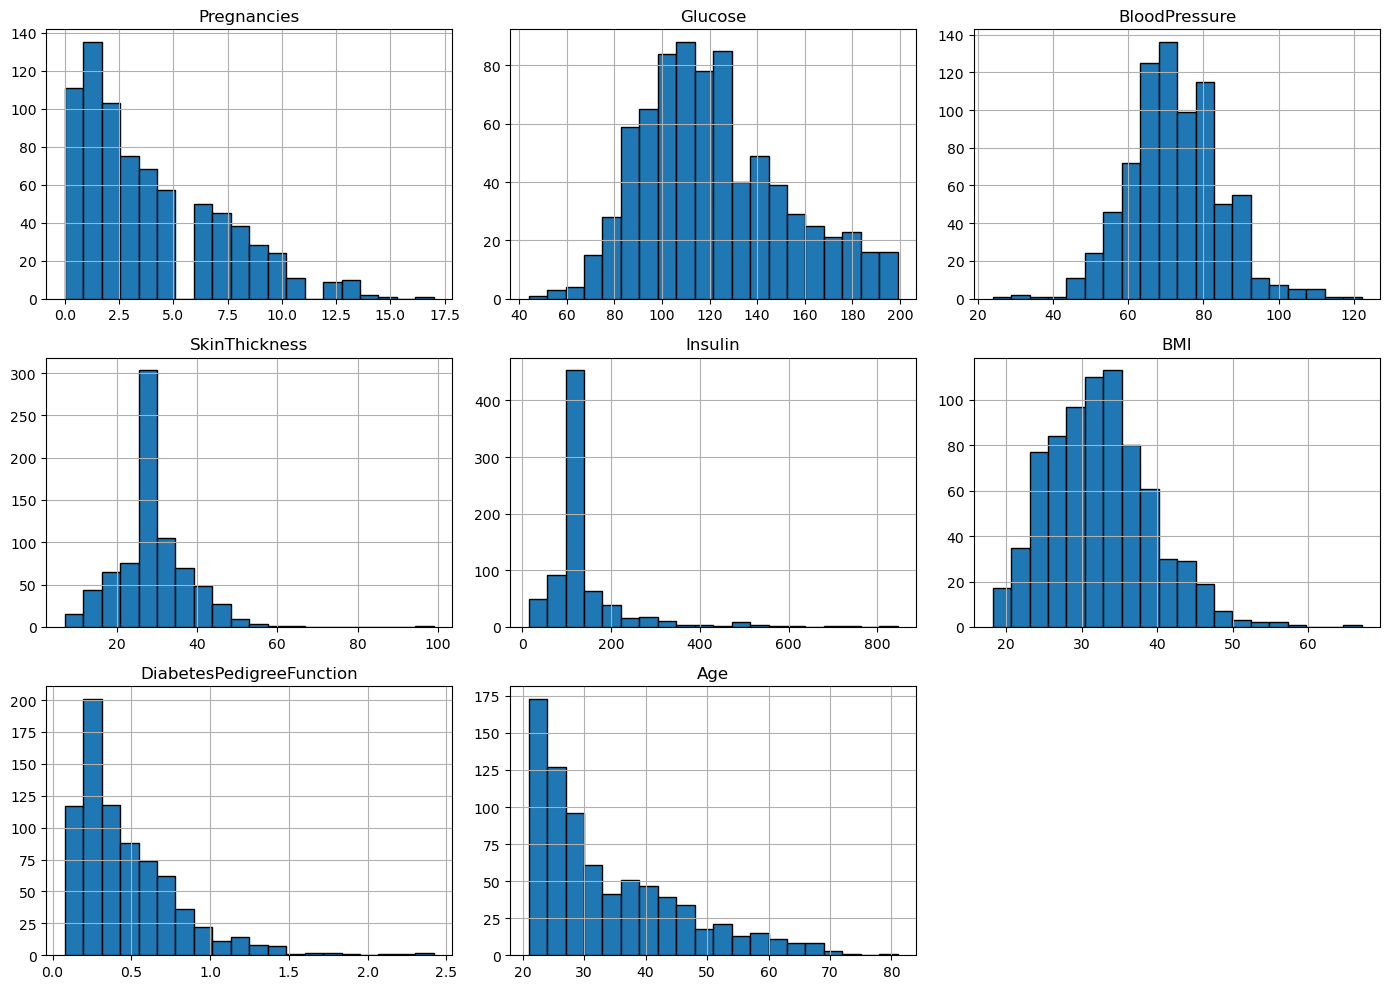

In [10]:
# Histogram grid for all numeric features
num_cols = df_filled.columns.drop("Outcome")
df_filled[num_cols].hist(figsize=(14, 10), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

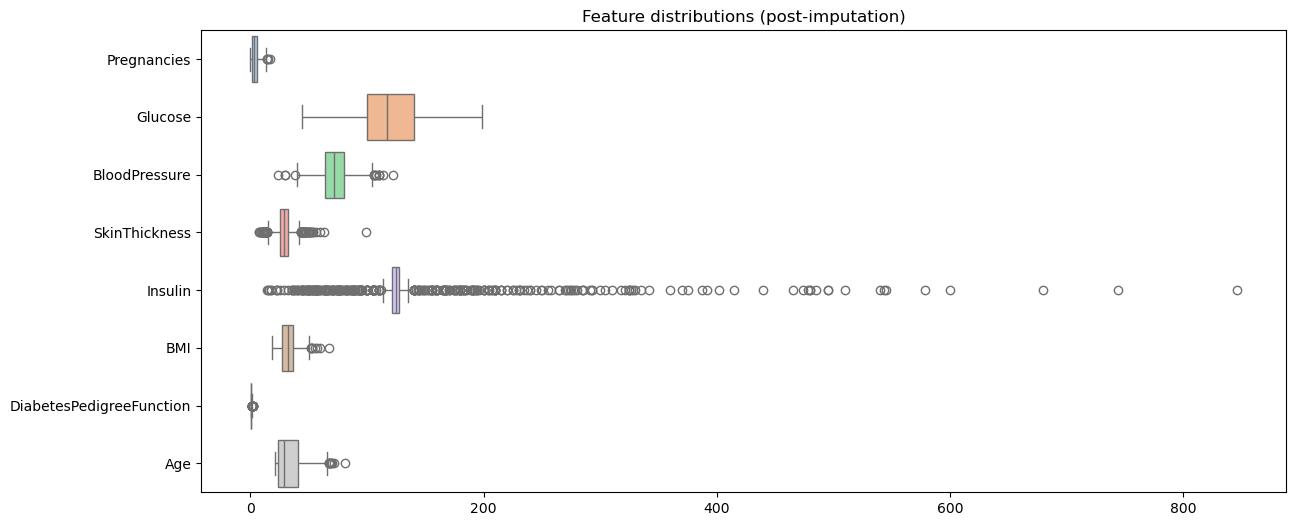

In [11]:
# Boxplots to spot remaining outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filled[num_cols], orient="h", palette="pastel")
plt.title("Feature distributions (post-imputation)")
plt.show()

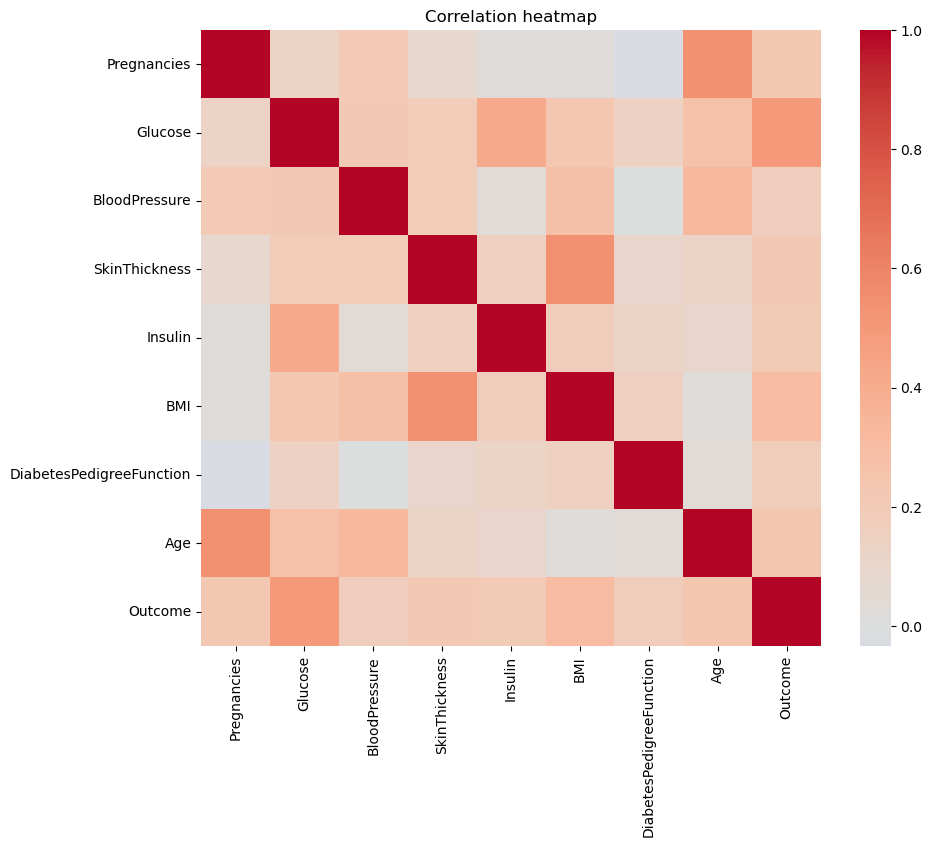

In [12]:
# Correlation matrix
corr = df_filled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation heatmap")
plt.show()

# Divide the data into input and output

In [13]:
# Separate features and target
X = df_filled.drop(columns=["Outcome"])
y = df_filled["Outcome"]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [14]:
# Class balance after encoding
class_balance = y.value_counts()
print(class_balance)
class_balance / len(y)

Outcome
0    500
1    268
Name: count, dtype: int64


Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64

In [15]:
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (768, 8)
Target vector shape: (768,)


# import KNN Model

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Convert all features into Z score

In [17]:
# Fit StandardScaler on the full dataset (demonstration)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.63994726,  0.86604475, -0.03198993,  0.67064253, -0.18154124,
         0.16661938,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , -0.01230129, -0.18154124,
        -0.85219976, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, -0.01230129, -0.18154124,
        -1.33250021,  0.60439732, -0.10558415],
       [-0.84488505, -1.07356674, -0.5283186 , -0.69524511, -0.54064177,
        -0.63388137, -0.92076261, -1.04154944],
       [-1.14185152,  0.50442227, -2.67907616,  0.67064253,  0.31656594,
         1.5493025 ,  5.4849091 , -0.0204964 ]])

In [18]:
# Wrap scaled array back into a DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-6.476301e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,4.625929e-18,1.000652,-2.552931,-0.720163,-0.153073,0.611265,2.542658
BloodPressure,768.0,5.782412e-18,1.000652,-4.002619,-0.693761,-0.031990,0.629782,4.104082
SkinThickness,768.0,-1.526557e-16,1.000652,-2.516429,-0.467597,-0.012301,0.329171,7.955377
Insulin,768.0,1.503427e-17,1.000652,-1.467353,-0.222085,-0.181541,-0.155477,8.170442
BMI,768.0,2.613650e-16,1.000652,-2.074783,-0.721209,-0.022590,0.603256,5.042397
DiabetesPedigreeFunction,768.0,2.451743e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.931325e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716


In [19]:
# Quick check: each column now has mean ~0 and std ~1
X_scaled_df.agg(["mean", "std"]).T

,mean,std
Pregnancies,-6.476301e-17,1.000652
Glucose,4.625929e-18,1.000652
BloodPressure,5.782412e-18,1.000652
SkinThickness,-1.526557e-16,1.000652
Insulin,1.503427e-17,1.000652
BMI,2.613650e-16,1.000652
DiabetesPedigreeFunction,2.451743e-16,1.000652
Age,1.931325e-16,1.000652


In [20]:
# For modeling we will scale inside a Pipeline to avoid data leakage during splitting/validation

# Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1,
    stratify=y,
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (537, 8), Test: (231, 8)


# Create KNN Model

In [22]:
knn_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5, weights="distance")),
])
knn_clf

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(weights='distance'))])

# Fitting KNN   on dataset

In [23]:
knn_clf.fit(X_train, y_train)
train_acc = knn_clf.score(X_train, y_train)
train_acc

1.0

In [24]:
y_pred = knn_clf.predict(X_test)
test_acc = knn_clf.score(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

Test accuracy: 0.749


# Display classification_report

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [26]:
print(classification_report(y_test, y_pred, target_names=["Non Diabetic", "Diabetic"]))

              precision    recall  f1-score   support

Non Diabetic       0.78      0.86      0.82       150
    Diabetic       0.68      0.54      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[129,  21],
       [ 37,  44]], dtype=int64)

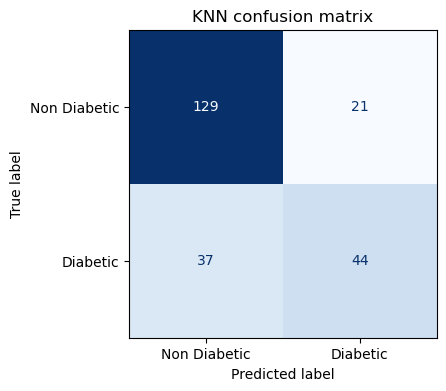

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Diabetic", "Diabetic"])
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("KNN confusion matrix")
plt.show()

In [29]:
results = {
    "train_accuracy": train_acc,
    "test_accuracy": test_acc,
}
results

{'train_accuracy': 1.0, 'test_accuracy': 0.7489177489177489}

In [30]:
# Optional: probability estimates for ROC/threshold analysis later
if hasattr(knn_clf.named_steps["knn"], "predict_proba"):
    y_proba = knn_clf.predict_proba(X_test)[:, 1]
    y_proba[:5]

# Use Cross Validation to find best hyperparameter for KNN

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
from sklearn.model_selection import KFold

In [33]:
k = KFold(n_splits=10)

In [34]:
cv_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier()),
])

In [35]:
cv_scores = cross_val_score(cv_pipe, X, y, cv=k, scoring="accuracy")

In [36]:
print("Fold accuracies:", np.round(cv_scores, 3))

Fold accuracies: [0.714 0.805 0.701 0.675 0.727 0.753 0.753 0.792 0.671 0.737]


In [37]:
print(f"Mean accuracy: {cv_scores.mean():.3f} +/- {cv_scores.std():.3f}")

Mean accuracy: 0.733 +/- 0.043


In [38]:
import numpy as np

In [39]:
x1 = np.arange(1,11).reshape(-1,1)

In [40]:
y1 = np.array([0,1,0,1,0,1,0,1,0,1])

In [41]:
x1

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [42]:
y1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [43]:
for i,j in k.split(x1):
    print("<------>")
    print(x1[i])
    print(x1[j])
    x_train,x_test = x1[i],x1[j]
    y_train,y_test = y1[i],y1[j]
    

<------>
[[ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[1]]
<------>
[[ 1]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[2]]
<------>
[[ 1]
 [ 2]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[3]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[4]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[5]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[6]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 8]
 [ 9]
 [10]]
[[7]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 9]
 [10]]
[[8]]
<------>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [10]]
[[9]]
<------>
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[10]]


In [44]:
parameters = {'knn__n_neighbors':(1,2,3,4,5,6,7,8,9,10,11),'knn__weights':('uniform', 'distance')}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
gs_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

In [47]:
grid = GridSearchCV(
    estimator=gs_pipe,
    param_grid=parameters,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)


In [48]:
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11),
                         'knn__weights': ('uniform', 'distance')},
             scoring='accuracy')

In [49]:
grid.best_params_

{'knn__n_neighbors': 11, 'knn__weights': 'uniform'}

In [50]:
print(f"Best CV accuracy: {grid.best_score_:.3f}")

Best CV accuracy: 0.758


In [51]:
best_knn = grid.best_estimator_
best_knn

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

In [52]:
# Restore the original train/test split (was overwritten by K-Fold demo)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1,
    stratify=y,
)
print(f"Restored split - Train: {X_train.shape}, Test: {X_test.shape}")

Restored split - Train: (537, 8), Test: (231, 8)


In [53]:
best_knn.fit(X_train, y_train)
best_test_acc = best_knn.score(X_test, y_test)
print(f"Test accuracy with best params: {best_test_acc:.3f}")

Test accuracy with best params: 0.758


In [54]:
best_pred = best_knn.predict(X_test)
print(classification_report(y_test, best_pred, target_names=["Non Diabetic", "Diabetic"]))

              precision    recall  f1-score   support

Non Diabetic       0.77      0.89      0.83       150
    Diabetic       0.71      0.52      0.60        81

    accuracy                           0.76       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [55]:
# Randomstate = 1
# Test size 0.3
# 

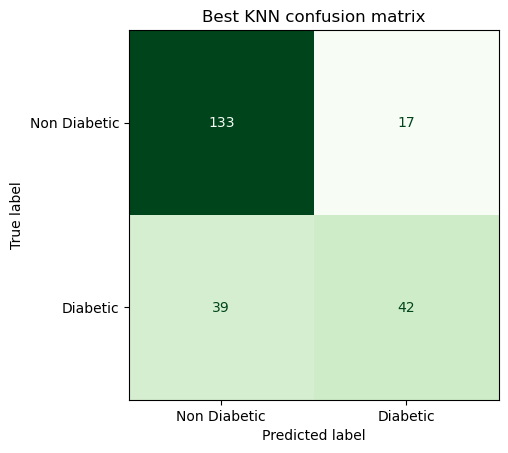

In [56]:
# Confusion matrix for best model
cm_best = confusion_matrix(y_test, best_pred)
ConfusionMatrixDisplay(cm_best, display_labels=["Non Diabetic", "Diabetic"]).plot(cmap="Greens", colorbar=False)
plt.title("Best KNN confusion matrix")
plt.show()